In [71]:
import csv,os,json
import requests

import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
import pandas as pd
import numpy as np
import time
from time import sleep

import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

In [41]:
if __name__ == "__main__":
    
    keyword=['bone','chitosan','hydrogel','nanoparticles','regeneration','polymer','tissue engineering','scaffold','adhesion','microstructure']
    for item in keyword:
        search_url="https://twitter.com/search?vertical=default&q=biomaterials%2C%20"+item+"&src=typd"
        executable_path = 'driver_set/geckodriver'
        driver = webdriver.Firefox(executable_path=executable_path)
        main_search=driver.get(search_url)
    
        src_updated = driver.page_source
        src = ""

        while src != src_updated:
    
    # save page source (i.e. html document) before page-down
            src = src_updated
    
    # execute javascript to scroll to the bottom of the window
    # you can also use page-down
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # sleep to allow content loaded
            time.sleep(1.5)
    
    # save page source after page-down
            src_updated = driver.page_source

        tweets=driver.find_elements_by_css_selector("[data-item-type=tweet]")
        all_data=[]
        file_name='tweets_'+item+'.txt'
        fw=open(file_name,'w')
        for tweet in tweets:
#         txt,retweets,comments, likes, dates='NaN','NaN','NaN','NaN','NaN'
            try: txt=tweet.find_element_by_css_selector("[class$=tweet-text]").text
            except: 
                txt="NaN"     

            try:
                retweetElement=tweet.find_element_by_css_selector("[class$=js-actionRetweet]")
                retweets=retweetElement.find_element_by_css_selector('[class=ProfileTweet-actionCountForPresentation]').text       

        #recommentElement=tweet.find_element_by_css_selector("[class$=js-actionReply]")
        #comments=recommentElement.find_element_by_css_selector('[class=ProfileTweet-actionCountForPresentation]').text                  
            except:
                retweets="NaN"
        
            try:
                recommentElement=tweet.find_element_by_css_selector("[class$=js-actionReply]")
                comments=recommentElement.find_element_by_css_selector('[class=ProfileTweet-actionCountForPresentation]').text                  
            except:
                comments="NaN"
    
            try:
                likeElement=tweet.find_element_by_css_selector("[class$=js-actionFavorite]")
                likes=likeElement.find_element_by_css_selector('[class=ProfileTweet-actionCountForPresentation]').text                  
            except:
                likes="NaN"
    
            try:
            #dateElement=driver.find_elements_by_xpath("//a[starts-with(@class,'tweet-timestamp js-permalink js-nav js-tooltip')]")
            #for item in dateElement:
                #dates=item.get_attribute("title")
                dates=tweet.find_element_by_css_selector('[data-long-form="true"]').text

            except:
                dates="NaN"

    #         data={
    #             'Content':txt,
    #             'Comment':comments,
    #             'Retweets':retweets,
    #             'Likes':likes,
    #             'Date': dates
    #         } 

    #         all_data.append(data)
            fw.write(txt.replace('\n',' ')+'\t'+str(comments)+'\t'+str(retweets)+'\t'+str(likes)+'\t'+str(dates)+'\n')

        fw.close()
        driver.quit()
#     f=open('tweets_nano.json','w') #serialize from the binary information to text information(string that can be read by people) convienient for transformation
#     json.dump(all_data,f,indent=2)

In [76]:
keyword=['bone','chitosan','hydrogel','nanoparticles','regeneration','polymer','tissue engineering','scaffold','adhesion','microstructure']
year_dic=[]
for item in keyword:
    file_name='tweets_'+item+'.txt'
    data_df = pd.read_csv(file_name, sep="\t", names=['Content','Comment','Retweets','Likes','Date'], error_bad_lines=False)
    data_df.dropna(axis=0, how='all', inplace=True)
    temp={}
    for item in data_df['Date']:
        date_list=item.split(" ")
    
        if len(date_list)==2 or (len(date_list)==1):
            date_list.append('2018')
    
        year=date_list[-1]
        if str(year) in temp:
            temp[str(year)]+=1
        else:
            temp[str(year)]=1
    year_dic.append(temp)
print(year_dic)

[{'2018': 34, '2017': 2, '2014': 9, '2013': 8, '2012': 4, '2011': 7, '2010': 4, '2009': 7}, {'2010': 3, '2014': 3, '2013': 4, '2017': 4, '2018': 13, '2015': 5, '2016': 2, '2011': 3}, {'2018': 35, '2016': 4, '2017': 9, '2015': 4, '2011': 3, '2013': 4, '2014': 2, '2010': 2}, {'2017': 15, '2018': 27, '2014': 7, '2015': 1, '2016': 6, '2012': 11, '2011': 5, '2010': 2, '2009': 6}, {'2018': 47, '2012': 11, '2017': 18, '2016': 9, '2015': 1, '2014': 2, '2011': 2, '2010': 3, '2009': 4}, {'2018': 31, '2013': 3, '2017': 15, '2012': 5, '2016': 7, '2015': 4, '2014': 3, '2010': 6, '2009': 6}, {'2018': 38, '2017': 15, '2016': 5, '2015': 1, '2014': 5, '2013': 7, '2012': 3, '2011': 13, '2010': 6, '2009': 6, '2008': 1}, {'2018': 30, '2016': 2, '2017': 7, '2015': 2, '2014': 11, '2013': 3, '2011': 3, '2010': 2, '2009': 4}, {'2018': 18, '2013': 4, '2014': 3, '2017': 6, '2012': 1, '2015': 2, '2016': 1, '2011': 1, '2010': 2, '2009': 2}, {'2013': 1, '2016': 4, '2017': 2, '2015': 1, '2018': 2}]


In [77]:
import csv
for i in range(0,10):
    topic_dic_sort = sorted(year_dic[i].items(), key=itemgetter(0), reverse=False)
    print(topic_dic_sort)
#     with open('/Users/Jingsi/Desktop/A_Wiley/Topic_trend/micro_reg/topic%d.csv'%i,'w') as out:
    with open('/Users/Jingsi/Desktop/A_Wiley/Blog_parse/twitter/count/%d.csv'%i,'w') as out:
        csv_out=csv.writer(out)
        csv_out.writerow(['year','number'])
        for row in topic_dic_sort:
            csv_out.writerow(row)

[('2009', 7), ('2010', 4), ('2011', 7), ('2012', 4), ('2013', 8), ('2014', 9), ('2017', 2), ('2018', 34)]
[('2010', 3), ('2011', 3), ('2013', 4), ('2014', 3), ('2015', 5), ('2016', 2), ('2017', 4), ('2018', 13)]
[('2010', 2), ('2011', 3), ('2013', 4), ('2014', 2), ('2015', 4), ('2016', 4), ('2017', 9), ('2018', 35)]
[('2009', 6), ('2010', 2), ('2011', 5), ('2012', 11), ('2014', 7), ('2015', 1), ('2016', 6), ('2017', 15), ('2018', 27)]
[('2009', 4), ('2010', 3), ('2011', 2), ('2012', 11), ('2014', 2), ('2015', 1), ('2016', 9), ('2017', 18), ('2018', 47)]
[('2009', 6), ('2010', 6), ('2012', 5), ('2013', 3), ('2014', 3), ('2015', 4), ('2016', 7), ('2017', 15), ('2018', 31)]
[('2008', 1), ('2009', 6), ('2010', 6), ('2011', 13), ('2012', 3), ('2013', 7), ('2014', 5), ('2015', 1), ('2016', 5), ('2017', 15), ('2018', 38)]
[('2009', 4), ('2010', 2), ('2011', 3), ('2013', 3), ('2014', 11), ('2015', 2), ('2016', 2), ('2017', 7), ('2018', 30)]
[('2009', 2), ('2010', 2), ('2011', 1), ('2012', 1), 

In [96]:
df_sum=pd.DataFrame(columns=['year','number'])
for i in range(0, 10):
#     path='/Users/Jingsi/Desktop/A_Wiley/Topic_trend/micro_reg/topic%d.csv'%i
    path='/Users/Jingsi/Desktop/A_Wiley/Blog_parse/twitter/count/%d.csv'%i
    df=pd.read_csv(path)
    df=df.loc[df['year'] >= 2000]
    print(df)
    df_sum=df.merge(right=df_sum, how='outer', left_on='year',right_on='year')
print(df_sum)

   year  number
0  2009       7
1  2010       4
2  2011       7
3  2012       4
4  2013       8
5  2014       9
6  2017       2
7  2018      34
   year  number
0  2010       3
1  2011       3
2  2013       4
3  2014       3
4  2015       5
5  2016       2
6  2017       4
7  2018      13
   year  number
0  2010       2
1  2011       3
2  2013       4
3  2014       2
4  2015       4
5  2016       4
6  2017       9
7  2018      35
   year  number
0  2009       6
1  2010       2
2  2011       5
3  2012      11
4  2014       7
5  2015       1
6  2016       6
7  2017      15
8  2018      27
   year  number
0  2009       4
1  2010       3
2  2011       2
3  2012      11
4  2014       2
5  2015       1
6  2016       9
7  2017      18
8  2018      47
   year  number
0  2009       6
1  2010       6
2  2012       5
3  2013       3
4  2014       3
5  2015       4
6  2016       7
7  2017      15
8  2018      31
    year  number
0   2008       1
1   2009       6
2   2010       6
3   2011      13
4  

In [98]:
column_name=['year','microstructure','adhesion','scaffold','tissue engineering','polymer','regeneration','nanoparticles','hydrogel','chitosan','bone','None']
df_sum.columns = column_name

In [100]:
df_res=df_sum.drop(['None'],axis=1)
df_res=df_res.groupby('year',as_index=False).mean()
df_res

,year,microstructure,adhesion,scaffold,tissue engineering,polymer,regeneration,nanoparticles,hydrogel,chitosan,bone
0,2008,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,NaN,2.0,4.0,6,6.0,4.0,6.0,NaN,NaN,7.0
2,2010,NaN,2.0,2.0,6,6.0,3.0,2.0,2.0,3.0,4.0
3,2011,NaN,1.0,3.0,13,NaN,2.0,5.0,3.0,3.0,7.0
4,2012,NaN,1.0,NaN,3,5.0,11.0,11.0,NaN,NaN,4.0
5,2013,1.0,4.0,3.0,7,3.0,NaN,NaN,4.0,4.0,8.0
6,2014,NaN,3.0,11.0,5,3.0,2.0,7.0,2.0,3.0,9.0
7,2015,1.0,2.0,2.0,1,4.0,1.0,1.0,4.0,5.0,NaN
8,2016,4.0,1.0,2.0,5,7.0,9.0,6.0,4.0,2.0,NaN
9,2017,2.0,6.0,7.0,15,15.0,18.0,15.0,9.0,4.0,2.0


In [101]:
df_res.fillna(0, inplace=True)
df_res.to_csv('/Users/Jingsi/Desktop/A_Wiley/for_tableau/twitter_topics.csv')

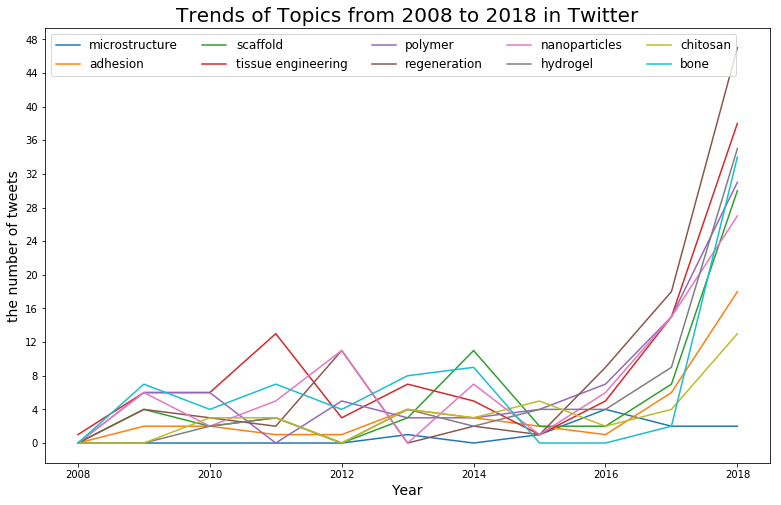

In [120]:
column_name_0=['microstructure','adhesion','scaffold','tissue engineering','polymer','regeneration','nanoparticles','hydrogel','chitosan','bone']
plt.figure(figsize=(13,8))

for column in df_res.drop('year', axis=1):
    plt.plot(df_res['year'], df_res[column], label=column)
plt.legend(column_name_0, ncol=5,loc=2,prop={'size': 12})

plt.xlabel('Year',fontsize=14)
plt.ylabel('the number of tweets', fontsize=14)
plt.xticks(np.arange(2008, 2020, 2))
plt.yticks(np.arange(0, 50, 4))

plt.title('Trends of Topics from 2008 to 2018 in Twitter',fontsize=20)
plt.savefig('Trends of Topics from 2000 to 2018 in Twitter.png')

In [73]:
# data_df = pd.read_csv('tweets_bone.txt', sep="\t", names=['Content','Comment','Retweets','Likes','Date'],header=None, error_bad_lines=False)
# data_df.dropna(axis=0, how='all', inplace=True)
# # data_df.fillna(0, inplace=True)
# data_df

,Content,Comment,Retweets,Likes,Date
0,Smart #biomaterials that are able to instruct ...,NaN,NaN,1.0,Nov 21
1,@DrJefferyMark1 Bone Tissue Engineering. Bioma...,NaN,NaN,NaN,23h
2,Join now to present your research on scaffolds...,NaN,NaN,NaN,15h
3,The study opens up avenues for the study of st...,NaN,NaN,NaN,17h
4,Greetings from Bone Tissue Engineering 2019!!B...,1.0,NaN,1.0,Nov 19
5,#Biomaterials for #Bone_Tissue_Engineering_201...,NaN,1.0,NaN,16h
6,#Citrate-based #biomaterial could help in bett...,NaN,NaN,1.0,15h
7,Check out this special issue of #bioactive coa...,NaN,NaN,1.0,Nov 26
9,Treatment of chronic osteomyelitis with antibi...,NaN,1.0,NaN,Nov 21
10,#Bone_Tissue_Engineering_2019 #Keynote #Oral ...,NaN,NaN,1.0,Nov 24


In [75]:
# year_dic=[]
# temp={}
# for item in data_df['Date']:
#     date_list=item.split(" ")
    
#     if (len(date_list)==2) or (len(date_list)==1):
#         date_list.append('2018')
    
#     year=date_list[-1]
#     if str(year) in temp:
#         temp[str(year)]+=1
#     else:
#         temp[str(year)]=1
# year_dic.append(temp)
# print(year_dic)

[{'2018': 34, '2017': 2, '2014': 9, '2013': 8, '2012': 4, '2011': 7, '2010': 4, '2009': 7}]
